<a href="https://colab.research.google.com/github/fzambran/curso-ml-dcc/blob/main/Examen_Curso_ML_DCC_Felipe_Zambrano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Curso Machine Learning DCC

En las instituciones bancarias existe el desafío comercial de vender los distintos productos a sus clientes. En este contexto, los bancos pueden ofrecer a sus clientes cuentas corrientes, tarjetas de crédito, créditos hipotecarios y seguros, entre otros, con ciertas características que los hagan atractivos para un segmento de clientes en particular.

Los ejecutivos de los bancos tienen que identificar a aquellos clientes que tengan la mayor probabilidad de aceptar (o no) una oferta de crédito.

Por tanto, el problema consiste en encontrar el mejor modelo que permita predecir qué clientes aceptarán la oferta de crédito.

Los datos tienen las siguientes variables:

| Variables  | Descripción               |
|------------|---------------------------|
| ID         | Identificador del cliente |
| GENERO     | Género del cliente        |
| RENTA      | Renta en pesos            |
| EDAD       | Edad en años              |
| NIV_EDUC   | Nivel Educacional         |
| E_CIVIL    | Estado Civil              |
| COD_OFI    | Código de la Oficina      |
| COD_COM    | Código de la Comuna       |
| CIUDAD     | Nombre Ciudad             |
| COL_1      | Colación Mes 1            |
| COL_2      | Colación Mes 2            |
| COL_3      | Colación Mes 3            |
| COL_4      | Colación Mes 4            |
| D_ACTUAL   | Deuda Actual              |
| D_MES_ANT  | Deuda Mes Anterior        |
| PROM_DEUDA | Deuda Promedio Anual      |
| M_MOROSO   | Meses en Mora             |       
| MONTO      | Monto Preaprobado         |
| SEGURO     | Seguro de desgravamen     |
| OFERTA     | Etiqueta (target)         |texto en cursiva

## Hipótesis

La hipótesis para este problema es que el mejor modelo para predecir qué clientes aceptarán la oferta de crédito es el Random Forest o un modelo de clasificación basado en árboles.

Para un banco tener un buen modelo predictivo de ofrecimiento de crédito es fundamental para canalizar adecuadamente los recursos y esfuerzos de los ejecutivos.

Por otra parte, desde el punto de vista del cliente recibir un ofrecimiento de crédito puede significar un ahorro en tiempo importante, de las gestiones que implica realizar una solicitud de este tipo. 

A continuación se desarrollará lo visto en clases para validar la hipótesis.

## Exploración de datos
## Aplicación de métodos de ML
## Conclusiones

In [ ]:
#from google.colab import files
#files.upload()



In [ ]:
import pandas as pd # Biblioteca de manejo de datos tabulares
import numpy as np
import sklearn.preprocessing
import sklearn.neighbors # Utilizaremos un regresor basado en KNN
import sklearn.tree # Métodos basados en árboles
import sklearn.model_selection # Validación cruzada
import sklearn.linear_model
import sklearn.tree
import sklearn.neural_network # Perceptrón multicapa
import sklearn.svm
import sklearn.dummy
import scipy.stats # Prueba estadística
import matplotlib.pyplot as plt
import sklearn.cluster # Algoritmos de clustering
import sklearn.metrics
import scipy.cluster
import seaborn as sns

Importación de datos

In [ ]:
#oferta_credito = pd.read_csv("oferta_credito.csv", delimiter=";")
#print(oferta_credito.head())

# Importar datos desde Github
#oferta_credito = pd.read_csv('https://raw.githubusercontent.com/fzambran/curso-ml-dcc/main/datos_examen/oferta_credito.csv', delimiter=";")
oferta_credito = pd.read_csv('https://raw.githubusercontent.com/fzambran/curso-ml-dcc/main/datos_examen/oferta_credito2.csv', delimiter=";")



Análisis de los datos

A continuación, visualizamos el tipo de variables de los datos

In [ ]:
oferta_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2294 non-null   float64
 1   GENERO       2283 non-null   object 
 2   RENTA        2294 non-null   int64  
 3   EDAD         2289 non-null   float64
 4   NIV_EDUC     2294 non-null   object 
 5   E_CIVIL      2283 non-null   object 
 6   COD_OFI      2294 non-null   int64  
 7   COD_COM      2294 non-null   object 
 8   CIUDAD       2294 non-null   object 
 9   COL_1        2294 non-null   int64  
 10  COL_2        2294 non-null   int64  
 11  COL_3        2294 non-null   int64  
 12  COL_4        2294 non-null   int64  
 13  D_ACTUAL     2294 non-null   int64  
 14  D_MES_ANT    2294 non-null   int64  
 15  PROM_DEUDA   2294 non-null   int64  
 16  M_MOROSO     2294 non-null   int64  
 17  MONTO        2294 non-null   int64  
 18  SEGURO       2294 non-null   object 
 19  OFERTA

Las variables de tipo **object** como **GENERO** y **E_CIVIL** son categóricas, por tanto, debemos tranformarlas a vectores para usarlas en los modelos.

Por otra parte, variables que deben ser numéricas como la **RENTA** también son de tipo **object**, por tanto, debemos transformarlas a variables numéricas.

A continuación, realizamos una exploración de los datos.

In [ ]:
oferta_credito

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,COL_1,...,COL_3,COL_4,D_ACTUAL,D_MES_ANT,PROM_DEUDA,M_MOROSO,MONTO,SEGURO,OFERTA,Unnamed: 20
0,1.000,M,1200000,39.0,TEC,CAS,42,31,COQUIMBO,3788129,...,0,412983,4116,9265,420,1,1700000,SI,NO ACEPTA,NaN
1,2.000,M,1200000,55.0,TEC,CAS,16,90,SANTIAGO,0,...,0,1527726,385,0,1724,1,5700000,NO,ACEPTA,NaN
2,3.000,M,800000,47.0,UNV,CAS,48,87,SANTIAGO,0,...,0,0,460,0,0,1,3200000,NO,ACEPTA,NaN
3,4.000,F,700000,47.0,TEC,CAS,79,148,SAN FERNANDO,1112326,...,0,1167713,1496,0,2356,2,1400000,NO,NO ACEPTA,NaN
4,5.000,F,4730000,32.0,TEC,CAS,52,88,SANTIAGO,0,...,0,15614,1085,0,29,1,2800000,NO,NO ACEPTA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,2.290,M,75000,40.0,UNV,CAS,35,84,SANTIAGO,0,...,1753310,0,599,24102,9,2,3700000,NO,ACEPTA,NaN
2290,2.291,F,600000,49.0,MED,CAS,62,292,PUERTO VARAS,0,...,0,0,1,0,0,1,2400000,NO,NO ACEPTA,NaN
2291,2.292,M,2000000,40.0,UNV,SEP,128,88,SANTIAGO,0,...,0,0,472,0,0,2,8000000,NO,NO ACEPTA,NaN
2292,2.293,F,5000000,37.0,TEC,SOL,73,86,SANTIAGO,0,...,0,0,0,32153,0,0,3900000,NO,NO ACEPTA,NaN


In [ ]:
oferta_credito.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,COL_1,...,COL_3,COL_4,D_ACTUAL,D_MES_ANT,PROM_DEUDA,M_MOROSO,MONTO,SEGURO,OFERTA,Unnamed: 20
0,1.0,M,1200000,39.0,TEC,CAS,42,31,COQUIMBO,3788129,...,0,412983,4116,9265,420,1,1700000,SI,NO ACEPTA,NaN
1,2.0,M,1200000,55.0,TEC,CAS,16,90,SANTIAGO,0,...,0,1527726,385,0,1724,1,5700000,NO,ACEPTA,NaN
2,3.0,M,800000,47.0,UNV,CAS,48,87,SANTIAGO,0,...,0,0,460,0,0,1,3200000,NO,ACEPTA,NaN
3,4.0,F,700000,47.0,TEC,CAS,79,148,SAN FERNANDO,1112326,...,0,1167713,1496,0,2356,2,1400000,NO,NO ACEPTA,NaN
4,5.0,F,4730000,32.0,TEC,CAS,52,88,SANTIAGO,0,...,0,15614,1085,0,29,1,2800000,NO,NO ACEPTA,NaN


Los datos tienen varias características o variables categóricas

In [ ]:
oferta_credito.describe()

,ID,RENTA,EDAD,COD_OFI,COL_1,COL_2,COL_3,COL_4,D_ACTUAL,D_MES_ANT,PROM_DEUDA,M_MOROSO,MONTO,Unnamed: 20
count,2294.000000,2.294000e+03,2289.000000,2294.000000,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,0.0
mean,218.671694,1.714922e+06,43.561381,68.542720,3.102876e+05,5.325353e+05,2.207494e+05,3.960351e+05,1127.667393,7008.370968,3659.818221,1.250218,3.477092e+06,NaN
std,311.954215,2.213844e+06,7.985992,40.164768,8.823218e+05,6.426396e+05,1.830098e+06,1.654516e+06,1842.400137,15131.036407,13793.189502,0.751906,2.292933e+06,NaN
min,1.000000,4.350000e+04,23.000000,0.000000,0.000000e+00,-2.907600e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,NaN
25%,1.572250,5.000000e+05,39.000000,31.000000,0.000000e+00,7.839125e+04,0.000000e+00,0.000000e+00,22.250000,0.000000,0.000000,1.000000,1.700000e+06,NaN
50%,2.144500,8.000000e+05,44.000000,56.000000,0.000000e+00,3.617390e+05,0.000000e+00,2.094600e+04,413.000000,0.000000,212.500000,1.000000,2.600000e+06,NaN
75%,425.750000,1.600750e+06,50.000000,92.000000,0.000000e+00,7.573520e+05,0.000000e+00,4.209025e+05,1439.250000,5060.500000,1146.750000,2.000000,4.800000e+06,NaN
max,999.000000,9.940000e+06,64.000000,155.000000,1.022472e+07,6.923740e+06,3.337417e+07,5.000000e+07,18565.000000,113126.000000,262321.000000,3.000000,8.000000e+06,NaN


In [ ]:
oferta_credito._get_numeric_data().head

<bound method NDFrame.head of          ID    RENTA  EDAD  COD_OFI    COL_1   COL_2    COL_3    COL_4  \
0     1.000  1200000  39.0       42  3788129  512102        0   412983   
1     2.000  1200000  55.0       16        0       0        0  1527726   
2     3.000   800000  47.0       48        0  800000        0        0   
3     4.000   700000  47.0       79  1112326  104780        0  1167713   
4     5.000  4730000  32.0       52        0  750000        0    15614   
...     ...      ...   ...      ...      ...     ...      ...      ...   
2289  2.290    75000  40.0       35        0  570775  1753310        0   
2290  2.291   600000  49.0       62        0       0        0        0   
2291  2.292  2000000  40.0      128        0  307335        0        0   
2292  2.293  5000000  37.0       73        0  430700        0        0   
2293  2.294  5000000  42.0       55        0  125658        0    90318   

      D_ACTUAL  D_MES_ANT  PROM_DEUDA  M_MOROSO    MONTO  Unnamed: 20  
0        

Detectamos que algunas variables numéricas como renta no están definidas como números

# Transformación de objetos a flotante

In [ ]:
oferta_credito['RENTA'] = oferta_credito['RENTA'].astype(float, errors= 'raise')
oferta_credito['COL_1'] = oferta_credito['COL_1'].astype(float, errors= 'raise')
oferta_credito['COL_2'] = oferta_credito['COL_2'].astype(float, errors= 'raise')
oferta_credito['COL_3'] = oferta_credito['COL_3'].astype(float, errors= 'raise')
oferta_credito['COL_4'] = oferta_credito['COL_4'].astype(float, errors= 'raise')
oferta_credito['D_ACTUAL'] = oferta_credito['D_ACTUAL'].astype(float, errors= 'raise')
oferta_credito['D_MES_ANT'] = oferta_credito['D_MES_ANT'].astype(float, errors= 'raise')
oferta_credito['PROM_DEUDA'] = oferta_credito['PROM_DEUDA'].astype(float, errors= 'raise')
oferta_credito['MONTO'] = oferta_credito['MONTO'].astype(float, errors= 'raise')

In [ ]:
#oferta_credito['RENTA'] = pd.to_numeric(oferta_credito['RENTA'], errors= 'coerce')
#oferta_credito['COL_1'] = pd.to_numeric(oferta_credito['COL_1'], errors= 'coerce')
#oferta_credito['COL_2'] = pd.to_numeric(oferta_credito['COL_2'], errors= 'coerce')
#oferta_credito['COL_3'] = pd.to_numeric(oferta_credito['COL_3'], errors= 'coerce')
#oferta_credito['COL_4'] = pd.to_numeric(oferta_credito['COL_4'], errors= 'coerce')
#oferta_credito['MONTO'] = pd.to_numeric(oferta_credito['MONTO'], errors= 'coerce')

Al cargar el CSV se encuentran una columna sin nombre (Unnamed). A continuación vamos a eliminar toda la columna 

In [ ]:
oferta_credito_2 = oferta_credito.loc[:, ~oferta_credito.columns.str.contains('^Unnamed')]

Buscamos las columnas que tienen datos faltantes (NaN o Not a Number)

In [ ]:
oferta_credito_2.isnull().any()

ID            False
GENERO         True
RENTA         False
EDAD           True
NIV_EDUC      False
E_CIVIL        True
COD_OFI       False
COD_COM       False
CIUDAD        False
COL_1         False
COL_2         False
COL_3         False
COL_4         False
D_ACTUAL      False
D_MES_ANT     False
PROM_DEUDA    False
M_MOROSO      False
MONTO         False
SEGURO        False
OFERTA        False
dtype: bool

Las columnas que tienen datos faltantes son aquellas con valor True

Muestra la suma de datos faltantes por columna

In [ ]:
print(oferta_credito_2.isnull().sum())

ID             0
GENERO        11
RENTA          0
EDAD           5
NIV_EDUC       0
E_CIVIL       11
COD_OFI        0
COD_COM        0
CIUDAD         0
COL_1          0
COL_2          0
COL_3          0
COL_4          0
D_ACTUAL       0
D_MES_ANT      0
PROM_DEUDA     0
M_MOROSO       0
MONTO          0
SEGURO         0
OFERTA         0
dtype: int64


A continuación, calculamos el número total de valores nulos o faltantes

In [ ]:
print(oferta_credito_2.isnull().sum().sum())

27


Tenemos 27 valores nulos de 2.294, lo que representa aproximadamente un 1% de los datos. Por tanto, vamos a eliminar todas las filas que contienen valores nulos o faltantes en vez de realizar una imputación. 

In [ ]:
oferta_credito_3 = oferta_credito_2.dropna(axis = 0)

In [ ]:
print(oferta_credito_3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2267 non-null   float64
 1   GENERO      2267 non-null   object 
 2   RENTA       2267 non-null   float64
 3   EDAD        2267 non-null   float64
 4   NIV_EDUC    2267 non-null   object 
 5   E_CIVIL     2267 non-null   object 
 6   COD_OFI     2267 non-null   int64  
 7   COD_COM     2267 non-null   object 
 8   CIUDAD      2267 non-null   object 
 9   COL_1       2267 non-null   float64
 10  COL_2       2267 non-null   float64
 11  COL_3       2267 non-null   float64
 12  COL_4       2267 non-null   float64
 13  D_ACTUAL    2267 non-null   float64
 14  D_MES_ANT   2267 non-null   float64
 15  PROM_DEUDA  2267 non-null   float64
 16  M_MOROSO    2267 non-null   int64  
 17  MONTO       2267 non-null   float64
 18  SEGURO      2267 non-null   object 
 19  OFERTA      2267 non-null  

In [ ]:
oferta_credito_3.isnull().any()

ID            False
GENERO        False
RENTA         False
EDAD          False
NIV_EDUC      False
E_CIVIL       False
COD_OFI       False
COD_COM       False
CIUDAD        False
COL_1         False
COL_2         False
COL_3         False
COL_4         False
D_ACTUAL      False
D_MES_ANT     False
PROM_DEUDA    False
M_MOROSO      False
MONTO         False
SEGURO        False
OFERTA        False
dtype: bool

In [ ]:
oferta_credito_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2267 non-null   float64
 1   GENERO      2267 non-null   object 
 2   RENTA       2267 non-null   float64
 3   EDAD        2267 non-null   float64
 4   NIV_EDUC    2267 non-null   object 
 5   E_CIVIL     2267 non-null   object 
 6   COD_OFI     2267 non-null   int64  
 7   COD_COM     2267 non-null   object 
 8   CIUDAD      2267 non-null   object 
 9   COL_1       2267 non-null   float64
 10  COL_2       2267 non-null   float64
 11  COL_3       2267 non-null   float64
 12  COL_4       2267 non-null   float64
 13  D_ACTUAL    2267 non-null   float64
 14  D_MES_ANT   2267 non-null   float64
 15  PROM_DEUDA  2267 non-null   float64
 16  M_MOROSO    2267 non-null   int64  
 17  MONTO       2267 non-null   float64
 18  SEGURO      2267 non-null   object 
 19  OFERTA      2267 non-null  

In [ ]:
oferta_credito_3

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,COL_1,COL_2,COL_3,COL_4,D_ACTUAL,D_MES_ANT,PROM_DEUDA,M_MOROSO,MONTO,SEGURO,OFERTA
0,1.000,M,1200000.0,39.0,TEC,CAS,42,31,COQUIMBO,3788129.0,512102.0,0.0,412983.0,4116.0,9265.0,420.0,1,1700000.0,SI,NO ACEPTA
1,2.000,M,1200000.0,55.0,TEC,CAS,16,90,SANTIAGO,0.0,0.0,0.0,1527726.0,385.0,0.0,1724.0,1,5700000.0,NO,ACEPTA
2,3.000,M,800000.0,47.0,UNV,CAS,48,87,SANTIAGO,0.0,800000.0,0.0,0.0,460.0,0.0,0.0,1,3200000.0,NO,ACEPTA
3,4.000,F,700000.0,47.0,TEC,CAS,79,148,SAN FERNANDO,1112326.0,104780.0,0.0,1167713.0,1496.0,0.0,2356.0,2,1400000.0,NO,NO ACEPTA
4,5.000,F,4730000.0,32.0,TEC,CAS,52,88,SANTIAGO,0.0,750000.0,0.0,15614.0,1085.0,0.0,29.0,1,2800000.0,NO,NO ACEPTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,2.290,M,75000.0,40.0,UNV,CAS,35,84,SANTIAGO,0.0,570775.0,1753310.0,0.0,599.0,24102.0,9.0,2,3700000.0,NO,ACEPTA
2290,2.291,F,600000.0,49.0,MED,CAS,62,292,PUERTO VARAS,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2400000.0,NO,NO ACEPTA
2291,2.292,M,2000000.0,40.0,UNV,SEP,128,88,SANTIAGO,0.0,307335.0,0.0,0.0,472.0,0.0,0.0,2,8000000.0,NO,NO ACEPTA
2292,2.293,F,5000000.0,37.0,TEC,SOL,73,86,SANTIAGO,0.0,430700.0,0.0,0.0,0.0,32153.0,0.0,0,3900000.0,NO,NO ACEPTA


In [ ]:
oferta_credito_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2267 non-null   float64
 1   GENERO      2267 non-null   object 
 2   RENTA       2267 non-null   float64
 3   EDAD        2267 non-null   float64
 4   NIV_EDUC    2267 non-null   object 
 5   E_CIVIL     2267 non-null   object 
 6   COD_OFI     2267 non-null   int64  
 7   COD_COM     2267 non-null   object 
 8   CIUDAD      2267 non-null   object 
 9   COL_1       2267 non-null   float64
 10  COL_2       2267 non-null   float64
 11  COL_3       2267 non-null   float64
 12  COL_4       2267 non-null   float64
 13  D_ACTUAL    2267 non-null   float64
 14  D_MES_ANT   2267 non-null   float64
 15  PROM_DEUDA  2267 non-null   float64
 16  M_MOROSO    2267 non-null   int64  
 17  MONTO       2267 non-null   float64
 18  SEGURO      2267 non-null   object 
 19  OFERTA      2267 non-null  

In [ ]:
oferta_credito_3._get_numeric_data().head

<bound method NDFrame.head of          ID      RENTA  EDAD  COD_OFI      COL_1     COL_2      COL_3  \
0     1.000  1200000.0  39.0       42  3788129.0  512102.0        0.0   
1     2.000  1200000.0  55.0       16        0.0       0.0        0.0   
2     3.000   800000.0  47.0       48        0.0  800000.0        0.0   
3     4.000   700000.0  47.0       79  1112326.0  104780.0        0.0   
4     5.000  4730000.0  32.0       52        0.0  750000.0        0.0   
...     ...        ...   ...      ...        ...       ...        ...   
2289  2.290    75000.0  40.0       35        0.0  570775.0  1753310.0   
2290  2.291   600000.0  49.0       62        0.0       0.0        0.0   
2291  2.292  2000000.0  40.0      128        0.0  307335.0        0.0   
2292  2.293  5000000.0  37.0       73        0.0  430700.0        0.0   
2293  2.294  5000000.0  42.0       55        0.0  125658.0        0.0   

          COL_4  D_ACTUAL  D_MES_ANT  PROM_DEUDA  M_MOROSO      MONTO  
0      412983.0    41

# Transformación de características a vectores

A continuación, vamos a separar las variables categóricas y la etiqueta o variable a predecir, para transformarlas en vectores.

Separamos estas características del conjunto de datos original.

In [ ]:
# Separamos las características del conjunto de datos
features = oferta_credito_3[["GENERO", "NIV_EDUC", "E_CIVIL", "CIUDAD", "SEGURO"]] #Características del conjunto de datos
label = oferta_credito_3["OFERTA"] #Etiqueta del conjunto de datos variable a predecir, el cliente acepta o no acepta el crédito

In [ ]:
features.head()

,GENERO,NIV_EDUC,E_CIVIL,CIUDAD,SEGURO
0,M,TEC,CAS,COQUIMBO,SI
1,M,TEC,CAS,SANTIAGO,NO
2,M,UNV,CAS,SANTIAGO,NO
3,F,TEC,CAS,SAN FERNANDO,NO
4,F,TEC,CAS,SANTIAGO,NO


In [ ]:
label.head()

0    NO ACEPTA
1       ACEPTA
2       ACEPTA
3    NO ACEPTA
4    NO ACEPTA
Name: OFERTA, dtype: object

In [ ]:
features.describe()

,GENERO,NIV_EDUC,E_CIVIL,CIUDAD,SEGURO
count,2267,2267,2267,2267,2267
unique,2,6,4,75,2
top,M,UNV,CAS,SANTIAGO,NO
freq,1374,932,1419,1373,1795


In [ ]:
label.describe()

count          2267
unique            2
top       NO ACEPTA
freq           1144
Name: OFERTA, dtype: object

In [ ]:
enc = sklearn.preprocessing.OneHotEncoder() # Instanciamos nuestro One-Hot Encoder
features_transformed = pd.DataFrame(
    enc.fit_transform(features).todense(), # Entrenamos nuestro transformador y transformamos las características
    columns = enc.get_feature_names_out()
)
features_transformed

,GENERO_F,GENERO_M,NIV_EDUC_,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,...,CIUDAD_TEMUCO,CIUDAD_TOCOPILLA,CIUDAD_VALDIVIA,CIUDAD_VALLENAR,CIUDAD_VALPARAISO,CIUDAD_VILLARRICA,CIUDAD_VINA DEL MAR,CIUDAD_VLLA ALEMANA,SEGURO_NO,SEGURO_SI
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2263,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2264,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2265,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


El subconjunto de datos original tenía 5 características y el conjunto de datos transformado tiene 89 características

In [ ]:
features.iloc[0,:]

GENERO              M       
NIV_EDUC            TEC     
E_CIVIL             CAS     
CIUDAD      COQUIMBO        
SEGURO                    SI
Name: 0, dtype: object

Pasamos de un espacio de 5 características a uno de 89 características

In [ ]:
features_transformed.iloc[0,:]

GENERO_F                   0.0
GENERO_M                   1.0
NIV_EDUC_                  0.0
NIV_EDUC_BAS               0.0
NIV_EDUC_EUN               0.0
                          ... 
CIUDAD_VILLARRICA          0.0
CIUDAD_VINA DEL MAR        0.0
CIUDAD_VLLA ALEMANA        0.0
SEGURO_NO                  0.0
SEGURO_SI                  1.0
Name: 0, Length: 89, dtype: float64

# Dataset ajustado

In [ ]:
df1 = oferta_credito_3[["RENTA", "EDAD", "COL_1", "COL_2", "COL_3", "COL_4", "D_ACTUAL", "D_MES_ANT", "PROM_DEUDA", "M_MOROSO", "MONTO"]]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RENTA       2267 non-null   float64
 1   EDAD        2267 non-null   float64
 2   COL_1       2267 non-null   float64
 3   COL_2       2267 non-null   float64
 4   COL_3       2267 non-null   float64
 5   COL_4       2267 non-null   float64
 6   D_ACTUAL    2267 non-null   float64
 7   D_MES_ANT   2267 non-null   float64
 8   PROM_DEUDA  2267 non-null   float64
 9   M_MOROSO    2267 non-null   int64  
 10  MONTO       2267 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 212.5 KB


In [ ]:
df1

,RENTA,EDAD,COL_1,COL_2,COL_3,COL_4,D_ACTUAL,D_MES_ANT,PROM_DEUDA,M_MOROSO,MONTO
0,1200000.0,39.0,3788129.0,512102.0,0.0,412983.0,4116.0,9265.0,420.0,1,1700000.0
1,1200000.0,55.0,0.0,0.0,0.0,1527726.0,385.0,0.0,1724.0,1,5700000.0
2,800000.0,47.0,0.0,800000.0,0.0,0.0,460.0,0.0,0.0,1,3200000.0
3,700000.0,47.0,1112326.0,104780.0,0.0,1167713.0,1496.0,0.0,2356.0,2,1400000.0
4,4730000.0,32.0,0.0,750000.0,0.0,15614.0,1085.0,0.0,29.0,1,2800000.0
...,...,...,...,...,...,...,...,...,...,...,...
2289,75000.0,40.0,0.0,570775.0,1753310.0,0.0,599.0,24102.0,9.0,2,3700000.0
2290,600000.0,49.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2400000.0
2291,2000000.0,40.0,0.0,307335.0,0.0,0.0,472.0,0.0,0.0,2,8000000.0
2292,5000000.0,37.0,0.0,430700.0,0.0,0.0,0.0,32153.0,0.0,0,3900000.0


In [ ]:
df1.index = range(df1.shape[0])

In [ ]:
df1

,RENTA,EDAD,COL_1,COL_2,COL_3,COL_4,D_ACTUAL,D_MES_ANT,PROM_DEUDA,M_MOROSO,MONTO
0,1200000.0,39.0,3788129.0,512102.0,0.0,412983.0,4116.0,9265.0,420.0,1,1700000.0
1,1200000.0,55.0,0.0,0.0,0.0,1527726.0,385.0,0.0,1724.0,1,5700000.0
2,800000.0,47.0,0.0,800000.0,0.0,0.0,460.0,0.0,0.0,1,3200000.0
3,700000.0,47.0,1112326.0,104780.0,0.0,1167713.0,1496.0,0.0,2356.0,2,1400000.0
4,4730000.0,32.0,0.0,750000.0,0.0,15614.0,1085.0,0.0,29.0,1,2800000.0
...,...,...,...,...,...,...,...,...,...,...,...
2262,75000.0,40.0,0.0,570775.0,1753310.0,0.0,599.0,24102.0,9.0,2,3700000.0
2263,600000.0,49.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2400000.0
2264,2000000.0,40.0,0.0,307335.0,0.0,0.0,472.0,0.0,0.0,2,8000000.0
2265,5000000.0,37.0,0.0,430700.0,0.0,0.0,0.0,32153.0,0.0,0,3900000.0


In [ ]:
df_modelo = pd.concat([df1, features_transformed], axis=1, join='inner')

In [ ]:
df_modelo

,RENTA,EDAD,COL_1,COL_2,COL_3,COL_4,D_ACTUAL,D_MES_ANT,PROM_DEUDA,M_MOROSO,...,CIUDAD_TEMUCO,CIUDAD_TOCOPILLA,CIUDAD_VALDIVIA,CIUDAD_VALLENAR,CIUDAD_VALPARAISO,CIUDAD_VILLARRICA,CIUDAD_VINA DEL MAR,CIUDAD_VLLA ALEMANA,SEGURO_NO,SEGURO_SI
0,1200000.0,39.0,3788129.0,512102.0,0.0,412983.0,4116.0,9265.0,420.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1200000.0,55.0,0.0,0.0,0.0,1527726.0,385.0,0.0,1724.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,800000.0,47.0,0.0,800000.0,0.0,0.0,460.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,700000.0,47.0,1112326.0,104780.0,0.0,1167713.0,1496.0,0.0,2356.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4730000.0,32.0,0.0,750000.0,0.0,15614.0,1085.0,0.0,29.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,75000.0,40.0,0.0,570775.0,1753310.0,0.0,599.0,24102.0,9.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2263,600000.0,49.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2264,2000000.0,40.0,0.0,307335.0,0.0,0.0,472.0,0.0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2265,5000000.0,37.0,0.0,430700.0,0.0,0.0,0.0,32153.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelamiento

A continuación, se encuentra una función que entrena un modelo para distintos subconjuntoos generados al azar.

In [ ]:
def cross_val_score(**kwargs):
    """
    Recibe los argumentos para pasárselos a la función sklearn.model_selection.cross_validate
    Retorna una lista con los valores de AUCROC de cada una de las divisiones.
    """
    cv = sklearn.model_selection.cross_validate( # Esta función entrena un modelo para distintos subconjuntos generados al azar.
        scoring = 'roc_auc', # Usamos la medida de AUCROC para medir el rendimiento de los modelos
        cv = sklearn.model_selection.StratifiedKFold( # La división se realiza de manera estratificada
            n_splits = 10, # Creamos 10 subconjuntos, se parte el conjunto de datos en 10 subconjuntos
            shuffle = True, # Desordenamos los datos antes de dividirlos
        ),
        n_jobs = None, # Usamos sólo 1 worker para el entrenmiento, divide cada entrenamiento en 1 hilo distinto de CPU
        **kwargs # Pasamos los argumentos recibidos por la función
    )
    return cv["test_score"]

Guardamos los valores de rendimiento para un conjunto de múltiples algoritmos de clasificación. Se definieron 10 subconjuntos, por tanto, voy a tener 10 resultados, de 10 modelos distintos.

La función para medir el rendimiento de los modelos es el AUC.

# Regresión Logística

In [ ]:
lr_scores = cross_val_score(
    estimator = sklearn.linear_model.LogisticRegression(max_iter=1000),
    X = df_modelo,
    y = label
)
lr_scores

array([0.62927019, 0.66024845, 0.59860248, 0.52329193, 0.65315945,
       0.5697873 , 0.6575066 , 0.59837093, 0.66596178, 0.61301692])

Los anteriores son los rendimientos asociados a cada una de las particiones o subconjuntos o métricas de AUC.

# Clasificador Basado en un Árbol de Decisión

In [ ]:
tree_scores = cross_val_score(
    estimator = sklearn.tree.DecisionTreeClassifier(),
    X = df_modelo,
    y = label
)
tree_scores

array([0.90341615, 0.93396739, 0.9380823 , 0.8935559 , 0.89873467,
       0.88111318, 0.92078093, 0.91588346, 0.92911967, 0.90288221])

Del resultado anterior, se observa que en una de las particiones tuvo un resultado o AUC de 0.9248

# Clasificador Basado en una Red Neuronal Perceptrón Multicapa

In [ ]:
mlp_scores = cross_val_score(
    estimator = sklearn.neural_network.MLPClassifier(max_iter=1000),
    X = df_modelo,
    y = label
)
mlp_scores

array([0.56638199, 0.62154503, 0.55958851, 0.5181677 , 0.53733892,
       0.57359106, 0.56722559, 0.54111842, 0.53289474, 0.60545896])

# Clasificador basado en un SVM

In [ ]:
svm_scores = cross_val_score(
    estimator = sklearn.svm.SVC(),
    X = df_modelo,
    y = label
)
svm_scores

array([0.65892857, 0.67158385, 0.58206522, 0.64868012, 0.65494488,
       0.70284117, 0.69096414, 0.7085683 , 0.64974937, 0.64223058])

# Clasificador Dummy

In [ ]:
dummy_scores = cross_val_score(
    estimator = sklearn.dummy.DummyClassifier(strategy="stratified"),
    X = df_modelo,
    y = label
)
dummy_scores

array([0.51486801, 0.54177019, 0.4314441 , 0.51979814, 0.54614967,
       0.55950163, 0.44519485, 0.46444236, 0.47807018, 0.51793546])

# Conclusiones

In [ ]:
scores = [ # Guardamos todos los resultados en una lista
    lr_scores,
    tree_scores,
    mlp_scores,
    svm_scores,
    dummy_scores
]
names = [
    "Logistic Regression",
    "Decision Tree",
    "Multilayer Perceptron",
    "Support Vector Machine",
    "Dummy Classifier"
]

Con esta visualización podemos ver la distribución de resultados para cada uno de los algoritmos seleccionados.

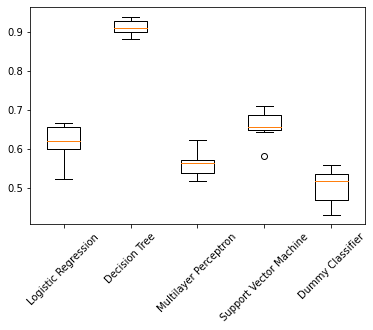

In [ ]:
plt.boxplot(
    scores,
    labels = names
)
plt.xticks(rotation=45)
plt.show()

Extraemos el resultado promedio de cada uno de los algoritmos. Se observa claramente que el algoritmos que mejor se comporta es el Decision Tree.

In [ ]:
dict(
    zip(
        names,
        map(
            np.mean,
            scores
        )
    )
)

{'Decision Tree': 0.9117535861826556,
 'Dummy Classifier': 0.5019174571673509,
 'Logistic Regression': 0.6169216013292177,
 'Multilayer Perceptron': 0.5623310913514066,
 'Support Vector Machine': 0.6610556203658435}

Para verificar si la diferencia entre las medias de los resultados es estadísticamente significativa utilizamos una prueba de ANOVA. Existen diferencias estadísticamente significativas entre cada uno de los algoritmos.

In [ ]:
scipy.stats.f_oneway(*scores)

F_onewayResult(statistic=182.10211397609928, pvalue=3.583068255597919e-27)

En este caso el mejor modelo según la métrica de rendimiento es Random Forest o Decision Tree con un AUC promedio de 0.91175

# Aprendizaje no supervisado

A continuación, vamos a realizar algunas visualizaciones de datos para encontrar agrupamientos o clustering.

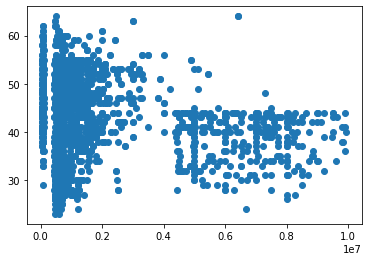

In [ ]:
plt.scatter(df_modelo.RENTA, df_modelo.EDAD) # Visualizamos la distribución de un conjunto de datos. Como los datos están en distinta escala es necesario normalizar

In [ ]:
df_grupo = df1[["RENTA", "MONTO"]]

In [ ]:
df_grupo

,RENTA,MONTO
0,1200000.0,1700000.0
1,1200000.0,5700000.0
2,800000.0,3200000.0
3,700000.0,1400000.0
4,4730000.0,2800000.0
...,...,...
2262,75000.0,3700000.0
2263,600000.0,2400000.0
2264,2000000.0,8000000.0
2265,5000000.0,3900000.0


In [ ]:
feature_names = [
    'RENTA', 
    'MONTO', 
]

features = df_grupo[feature_names]

# Robust Scaler

In [ ]:
def rescale_data(df,scaler):
    """
    Recibe un dataframe y un método de escalamiento de variables.
    Retorna un dataframe con las variables escaladas utilizando el método especificado.
    """
    if scaler != None:
        features_rescaled = scaler.fit_transform(df_grupo) # Transformamos los datos utilizando un método de escalamiento.
        return pd.DataFrame(features_rescaled,columns=feature_names)
    else:
        return df

In [ ]:
features_rs = rescale_data(df_grupo, sklearn.preprocessing.RobustScaler())
features_rs.describe()

,RENTA,MONTO
count,2267.000000,2267.000000
mean,0.818941,0.283222
std,1.972856,0.738760
min,-0.671251,-0.677419
25%,-0.266193,-0.290323
50%,0.000000,0.000000
75%,0.733807,0.709677
max,8.110027,1.741935


In [ ]:
features_rs

,RENTA,MONTO
0,0.354925,-0.290323
1,0.354925,1.000000
2,0.000000,0.193548
3,-0.088731,-0.387097
4,3.487134,0.064516
...,...,...
2262,-0.643301,0.354839
2263,-0.177462,-0.064516
2264,1.064774,1.741935
2265,3.726708,0.419355


El primer paso es generar tantos centroides al azar como grupos queremos ajustar.

In [ ]:
def initialize_centroids(data, k):
    centroids = []
    for i in range(k):
        centroids.append(np.random.random(data.shape[1]) * (data.max() - data.min()) + data.min())
    return np.vstack(centroids)

In [ ]:
centroids = initialize_centroids(features_rs, 5)
centroids

array([[ 4.51410695, -0.01016614],
       [ 0.08275463, -0.0712233 ],
       [ 2.66613532,  0.30747333],
       [ 2.67138046,  1.32415948],
       [ 6.85193576, -0.05381693]])

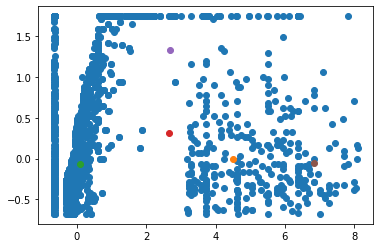

In [ ]:
plt.scatter(features_rs.RENTA, features_rs.MONTO) # Exploramos la distribución que tienen nuestros datos
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1])

Después, debemos calcular la distancia de cada punto del conjunto de datos hacia cada uno de los centroides

In [ ]:
distances = sklearn.metrics.pairwise.euclidean_distances(features_rs,centroids)
distances

array([[4.16860716, 0.34940088, 2.38726937, 2.82356515, 6.50131442],
       [4.28009738, 1.10525827, 2.41273461, 2.33902698, 6.58192102],
       [4.51870127, 0.27740291, 2.66856824, 2.90078524, 6.85639943],
       ...,
       [3.8688189 , 2.0620151 , 2.14989316, 1.66003674, 6.05937051],
       [0.89693102, 3.67682793, 1.0664577 , 1.39010352, 3.16084476],
       [0.90270274, 3.66375394, 1.30423406, 2.06569212, 3.15044278]])

Asignamos cada punto del conjunto de datos al cluster asociado al centroide más cercano.

In [ ]:
labels = distances.argmin(axis=1)
labels

array([1, 1, 1, ..., 3, 0, 0])

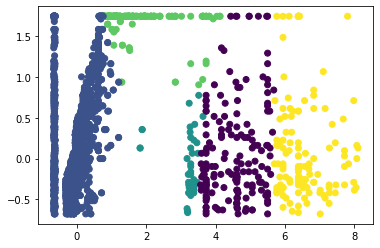

In [ ]:
plt.scatter(features_rs.RENTA, features_rs.MONTO, c = labels) # Exploramos la distribución que tienen nuestros datos